# Animating Life Expectancy Trends for Males and Females
Using [this](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1) blog post and [data](https://www.cdc.gov/nchs/data/nvsr/nvsr68/nvsr68_07-508.pdf ) from the CDC.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

In [2]:
animation.writers.list()

['ffmpeg', 'ffmpeg_file', 'html']

In [32]:
# load in data
LifeExpectancy = pd.read_excel('usa-life-expectancy.xlsx','clean')
LifeExpectancy = LifeExpectancy.sort_values(by='Year', ascending=True)
# Example data: 
# overdoses = pd.read_excel('overdose_data_1999-2015.xls',sheetname='Online',skiprows =6)
LifeExpectancy.head()

,Year,Male,Female
96,1921,60.0,61.8
95,1922,58.4,61.0
94,1923,56.1,58.5
93,1924,58.1,61.5
92,1925,57.6,60.6


Next we initialize a writer which uses ffmpeg and records at 20 fps with a bitrate of 1800. You can of course pick these values yourself.

In [16]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

<IPython.core.display.Javascript object>


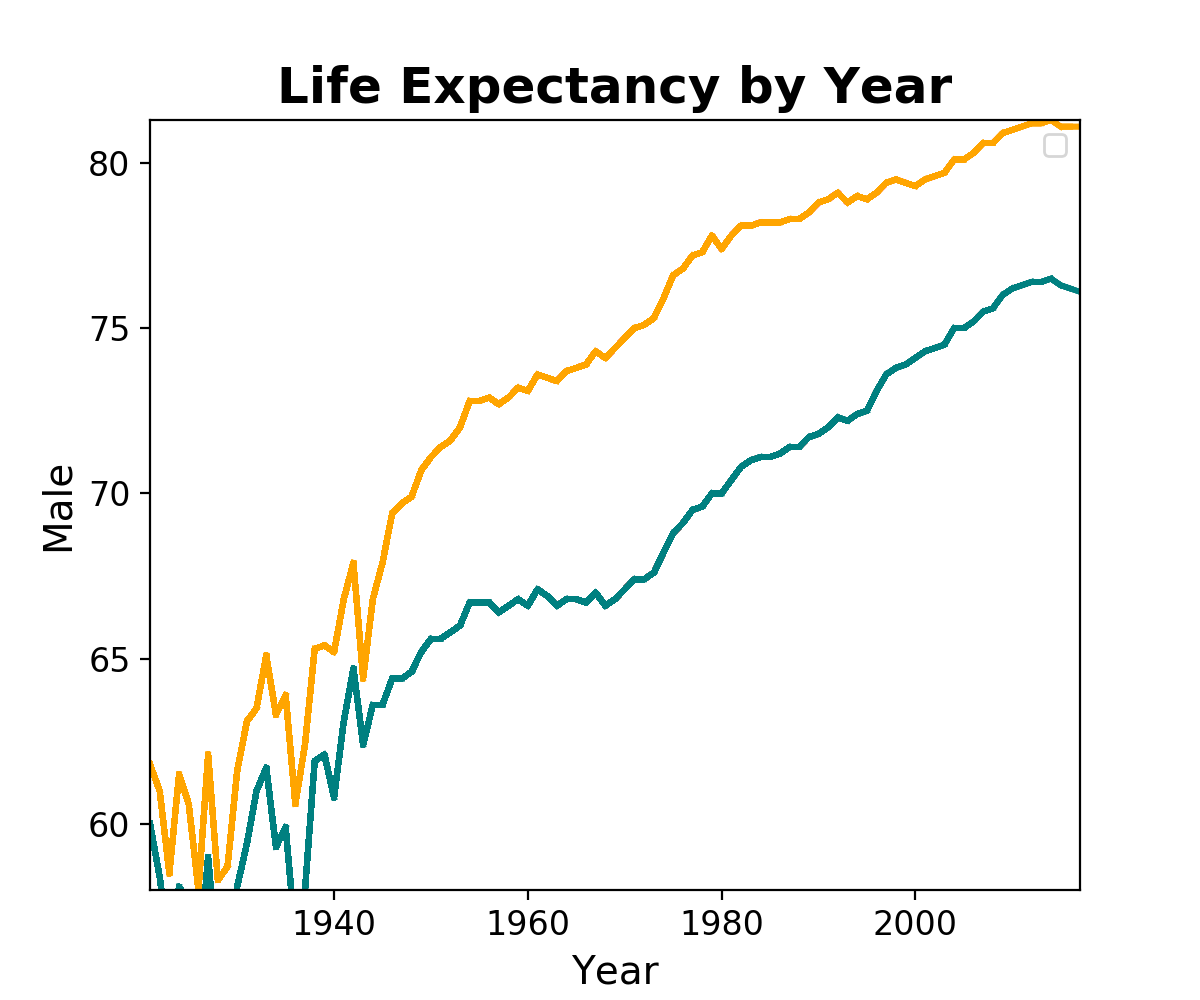

No handles with labels found to put in legend.


In [38]:
# create a figure with some labels
title = 'Female'
title2 = 'Male'
fig = plt.figure(figsize=(6,5))
plt.xlim(1921, 2017)
#need to adjust the y limits to have some buffer space
plt.ylim(np.min(LifeExpectancy[title]), np.max(LifeExpectancy[title]))
plt.xlabel('Year',fontsize=14)
plt.ylabel(title,fontsize=14)
plt.title('Life Expectancy by Year',fontsize=18, fontfamily='Calibri', fontweight='bold')
plt.legend() #Fill in this function to get your label

def animate(i):
    data = LifeExpectancy.iloc[:int(i+1)] #select data range
    p1 = sns.lineplot(x=data['Year'], y=data[title], data=data, color="orange")
    p1.tick_params(labelsize=12)
    plt.setp(p1.lines,linewidth=2)
    p2 = sns.lineplot(x=data['Year'], y=data[title2], data=data, color="teal")
    p1.tick_params(labelsize=12)
    plt.setp(p2.lines,linewidth=2)
    
ani = animation.FuncAnimation(fig, animate, frames=len(LifeExpectancy[title]), repeat=True)

plt.show()

In [27]:
# to save it
ani.save('usa-life-expectancy.mp4', writer=writer)


this is the iteration: 0
this is the iteration: 0
this is the iteration: 1
this is the iteration: 2
this is the iteration: 3
this is the iteration: 4
this is the iteration: 5
this is the iteration: 6
this is the iteration: 7
this is the iteration: 8
this is the iteration: 9
this is the iteration: 10
this is the iteration: 11
this is the iteration: 12
this is the iteration: 13
this is the iteration: 14
this is the iteration: 15
this is the iteration: 16


In [10]:
# to avoid the line's jumpiness, augment with intermediary data
# this increases the number of frames in the animation
def augment(xold,yold,numsteps):
    xnew = []
    ynew = []
    for i in range(len(xold)-1):
        difX = xold[i+1]-xold[i]
        stepsX = difX/numsteps
        difY = yold[i+1]-yold[i]
        stepsY = difY/numsteps
        for s in range(numsteps):
            xnew = np.append(xnew,xold[i]+s*stepsX)
            ynew = np.append(ynew,yold[i]+s*stepsY)
    return xnew,ynew

In [11]:
# additional smoothing function
def smoothListGaussian(listin,strippedXs=False,degree=5):  
    window=degree*2-1  
    weight=np.array([1.0]*window)  
    weightGauss=[]  
    for i in range(window):  
        i=i-degree+1  
        frac=i/float(window)  
        gauss=1/(np.exp((4*(frac))**2))  
        weightGauss.append(gauss)
    weight=np.array(weightGauss)*weight  
    smoothed=[0.0]*(len(listin)-window)  
    for i in range(len(smoothed)): smoothed[i]=sum(np.array(listin[i:i+window])*weight)/sum(weight)  
    return smoothed

In [ ]:
# plot background style 
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey',
            'figure.edgecolor':'black','axes.grid':False})